In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [67]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [68]:
df.shape

(103, 7)

In [69]:
df.dtypes

Unnamed: 0                     int64
Country                       object
Continent                     object
Production (Tons)             object
Production per Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

In [70]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".", "")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".", "")
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [71]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [72]:
df.isnull().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [73]:
df[df["Acreage (Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [74]:
df= df.dropna().reset_index()
df = df.drop("Unnamed: 0", axis = 1)
df = df.drop("index", axis = 1)

In [75]:
df

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,11949.8


In [76]:
df.nunique()

Country                       102
Continent                       6
Production (Tons)             102
Production per Person (Kg)    101
Acreage (Hectare)             101
Yield (Kg / Hectare)          102
dtype: int64

In [77]:
df.dtypes

Country                       object
Continent                     object
Production (Tons)             object
Production per Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

In [78]:
df["Production (Tons)"] = df["Production (Tons)"].astype(float)
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].astype(float)
df["Acreage (Hectare)"]= df["Acreage (Hectare)"].astype(float)
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].astype(float)

In [79]:
df.dtypes

Country                        object
Continent                      object
Production (Tons)             float64
Production per Person (Kg)    float64
Acreage (Hectare)             float64
Yield (Kg / Hectare)          float64
dtype: object

# Univariate Analysis

In [81]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## How many countries produce sugarcane from each continent?


In [83]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent', ylabel='count'>

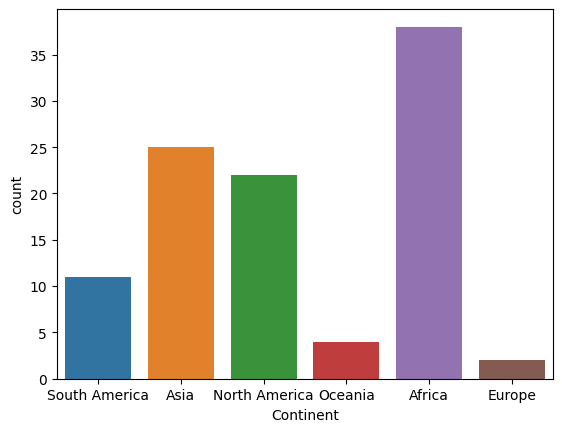

In [84]:
sns.countplot(x = "Continent", data = df)

## Checking outliers

In [86]:
df.describe()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


<Axes: >

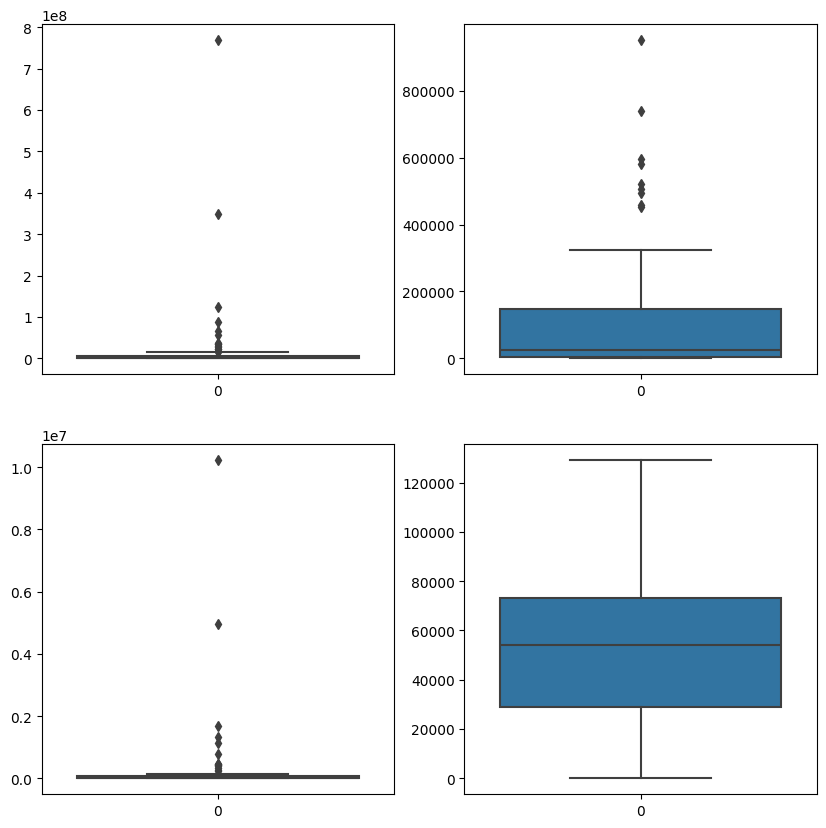

In [88]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production (Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["Production per Person (Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df["Acreage (Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df["Yield (Kg / Hectare)"])

we have outliers in the data but outliers are required here as it shows the countries which has maximum production. And then we can see what are the reasons for outliers.

## Distribution of the columns

C:\Users\DELL\AppData\Local\Temp\ipykernel_26120\517163927.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production (Tons)"])
C:\Users\DELL\AppData\Local\Temp\ipykernel_26120\517163927.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production per Person (Kg)"])
C:\Users\DELL\A

<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Density'>

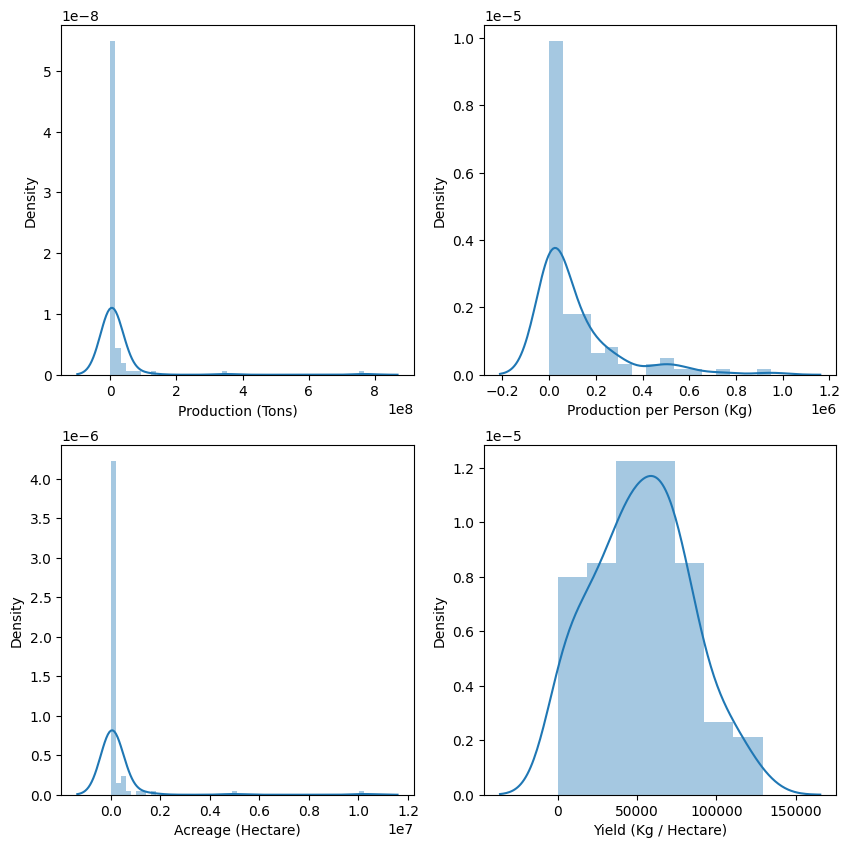

In [90]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production (Tons)"])
plt.subplot(2,2,2)
sns.distplot(df["Production per Person (Kg)"])
plt.subplot(2,2,3)
sns.distplot(df["Acreage (Hectare)"])
plt.subplot(2,2,4)
sns.distplot(df["Yield (Kg / Hectare)"])

# BIVARIATE ANALYSIS

In [91]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## Which country produces maximum sugarcane?

In [100]:
df[["Country", "Production (Tons)"]].set_index("Country").sort_values("Production (Tons)", ascending= False).head(15)

,Production (Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
Mexico,56446821.0
Colombia,36951213.0
Australia,34403004.0
Guatemala,33533403.0


[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Colombia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Guatemala'),
 Text(9, 0, 'United States of America'),
 Text(10, 0, 'Indonesia'),
 Text(11, 0, 'Philippines'),
 Text(12, 0, 'Argentina'),
 Text(13, 0, 'Cuba'),
 Text(14, 0, 'Vietnam')]

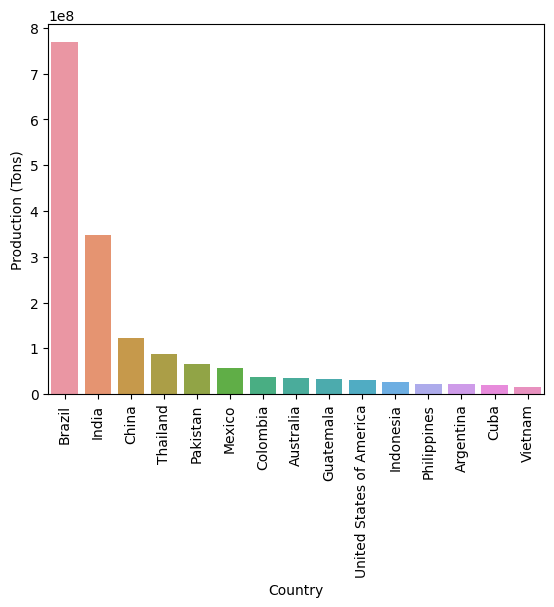

In [96]:
ax = sns.barplot(data = df.head(15), x = "Country", y = "Production (Tons)")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

In [114]:
df_new = df[["Country","Production (Tons)"]].set_index("Country")

In [116]:
df_new["Production_percentage"] = (df_new["Production (Tons)"]*100)/df_new["Production (Tons)"].sum()
df_new.head()

,Production (Tons),Production_percentage
Country,,
Brazil,768678382.0,40.727285
India,348448000.0,18.462001
China,123059739.0,6.520138
Thailand,87468496.0,4.634389
Pakistan,65450704.0,3.467809


<Axes: ylabel='Production_percentage'>

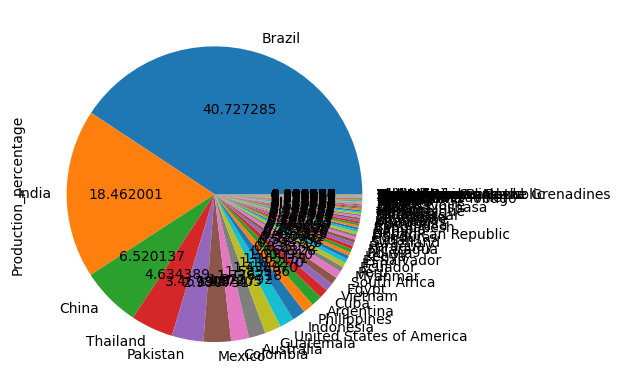

In [117]:
df_new["Production_percentage"].plot(kind = "pie", autopct = "%2f")

## Which country has highest land?


In [132]:
df_acr = df.sort_values("Acreage (Hectare)", ascending= False)

df_acr.head(15).reset_index()

,index,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
5,5,Mexico,North America,56446821.0,452524.000,781054.0,7227.0
6,10,Indonesia,Asia,27158830.0,10248.000,472693.0,57455.5
7,7,Australia,Oceania,34403004.0,1373.406,447204.0,76929.1
8,13,Cuba,North America,18890972.0,1683.528,442307.0,42710.1
9,6,Colombia,South America,36951213.0,740075.000,416626.0,88691.5



ax = sns.barplot(x = "Country", y = "Acreage (Hectare)", data = df_acr.head(15))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

## Which country has highest yield per hectare?


In [128]:
df_yield = df[["Country", "Yield (Kg / Hectare)"]].sort_values("Yield (Kg / Hectare)", ascending= False)
df_yield

,Country,Yield (Kg / Hectare)
8,Guatemala,129049.3
57,Senegal,118085.3
15,Egypt,115030.6
18,Peru,112120.2
40,Malawi,107629.5
...,...,...
88,Saint Lucia,80.0
55,Trinidad and Tobago,54.0
99,Singapore,25.0
87,Iraq,20.0


[Text(0, 0, 'Guatemala'),
 Text(1, 0, 'Senegal'),
 Text(2, 0, 'Egypt'),
 Text(3, 0, 'Peru'),
 Text(4, 0, 'Malawi'),
 Text(5, 0, 'Chad'),
 Text(6, 0, 'Zambia'),
 Text(7, 0, 'Burkina Faso'),
 Text(8, 0, 'Swaziland'),
 Text(9, 0, 'Nicaragua'),
 Text(10, 0, 'El Salvador'),
 Text(11, 0, 'Colombia'),
 Text(12, 0, 'Portugal'),
 Text(13, 0, 'Syria'),
 Text(14, 0, 'Honduras')]

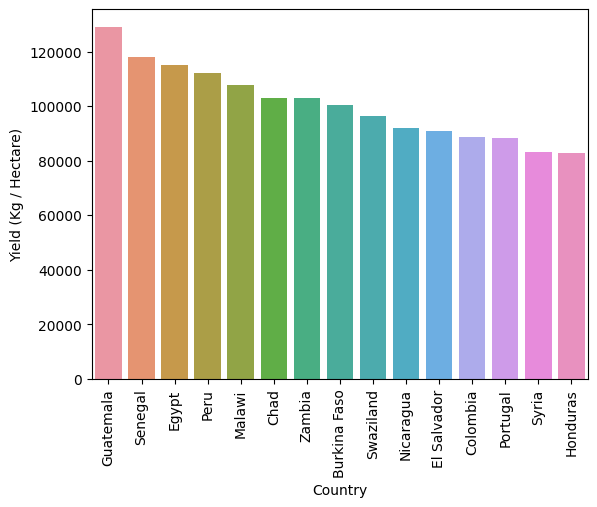

In [129]:
ax = sns.barplot(data = df_yield.head(15), x = "Country", y = "Yield (Kg / Hectare)")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

## Which country has highest production per person?


In [137]:
df_ppp = df[["Country", "Production per Person (Kg)"]].sort_values("Production per Person (Kg)", ascending= False)
df_ppp.reset_index()


,index,Country,Production per Person (Kg)
0,25,Paraguay,951087.0
1,6,Colombia,740075.0
2,55,Trinidad and Tobago,597066.0
3,42,Panama,581814.0
4,51,Jamaica,521254.0
...,...,...,...
97,98,Lebanon,16.0
98,99,Singapore,9.0
99,97,Spain,8.0
100,100,Samoa,6.0


[Text(0, 0, 'Paraguay'),
 Text(1, 0, 'Colombia'),
 Text(2, 0, 'Trinidad and Tobago'),
 Text(3, 0, 'Panama'),
 Text(4, 0, 'Jamaica'),
 Text(5, 0, 'Ecuador'),
 Text(6, 0, 'Argentina'),
 Text(7, 0, 'Dominican Republic'),
 Text(8, 0, 'Mexico'),
 Text(9, 0, 'Pakistan'),
 Text(10, 0, 'Peru'),
 Text(11, 0, 'Barbados'),
 Text(12, 0, 'Laos'),
 Text(13, 0, 'South Africa'),
 Text(14, 0, 'India')]

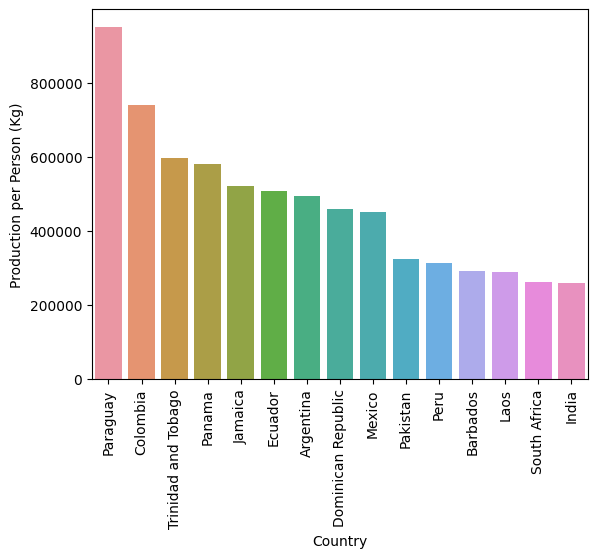

In [139]:
ax = sns.barplot(x = "Country", y = "Production per Person (Kg)",data = df_ppp.head(15))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

## Correlation

In [149]:
corr = df.corr(numeric_only=True)

<Axes: >

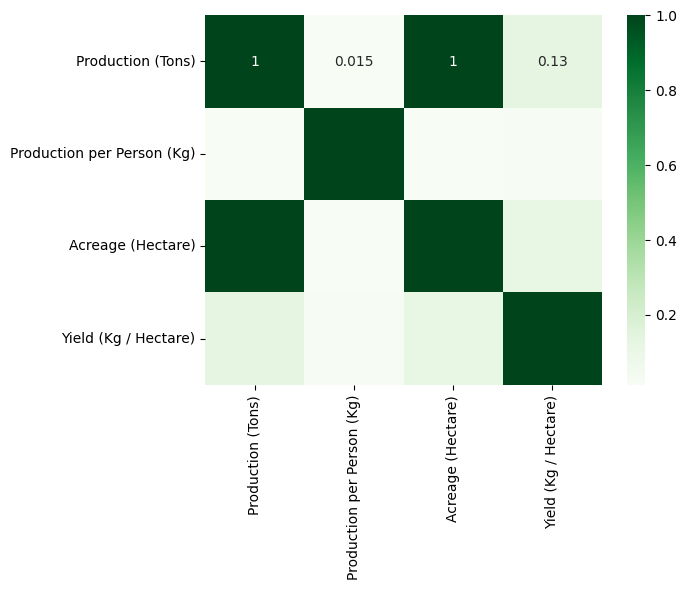

In [150]:
sns.heatmap(corr, annot = True, cmap = "Greens")

## Do countries with highest land produce more sugarcane?


<Axes: xlabel='Acreage (Hectare)', ylabel='Production (Tons)'>

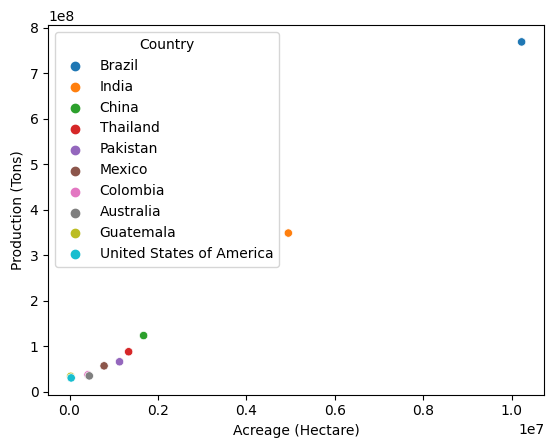

In [158]:
sns.scatterplot(data = df.head(10),x = "Acreage (Hectare)", y = "Production (Tons)", hue = "Country")

<Axes: xlabel='Acreage (Hectare)', ylabel='Production (Tons)'>

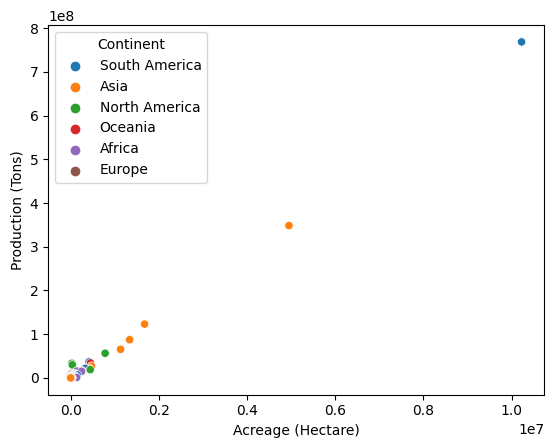

In [159]:
sns.scatterplot(data = df,x = "Acreage (Hectare)", y = "Production (Tons)", hue = "Continent")

## Do countries which yield more sugarcane per hectare produces more sugarcane in total?


<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Production (Tons)'>

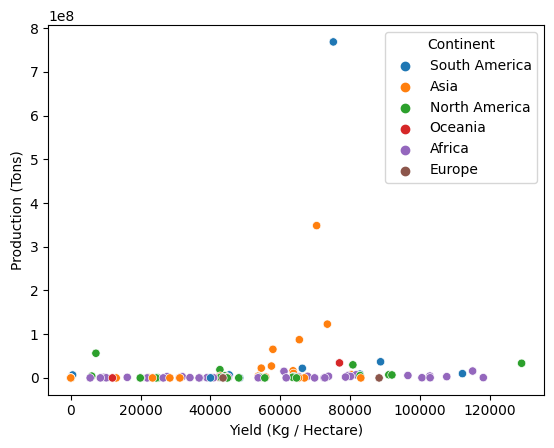

In [163]:
sns.scatterplot(data = df, x = "Yield (Kg / Hectare)",y = "Production (Tons)", hue = "Continent")

# Analysis for Continent


In [176]:
df_conti = df.groupby("Continent").sum().drop("Country", axis = 1)
df_conti["no_of_countries"] = df.groupby("Continent").count()["Country"]
df_conti

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),no_of_countries
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


### Which continent produces maximum sugarcane?


<Axes: xlabel='Continent', ylabel='Production (Tons)'>

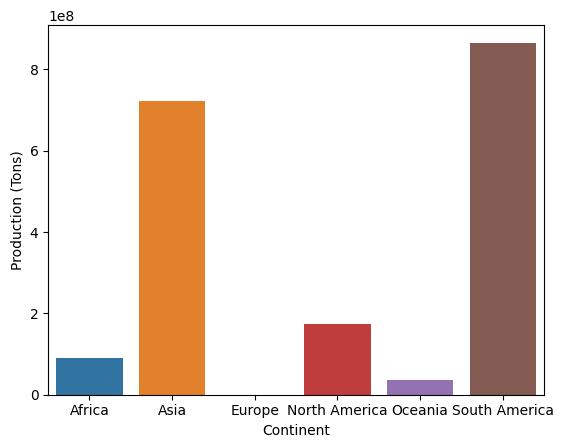

In [180]:
sns.barplot(x = df_conti.index ,y = "Production (Tons)" , data= df_conti)

## Do number of countries in a Continent effects production of sugarcane?


<Axes: xlabel='no_of_countries', ylabel='Production (Tons)'>

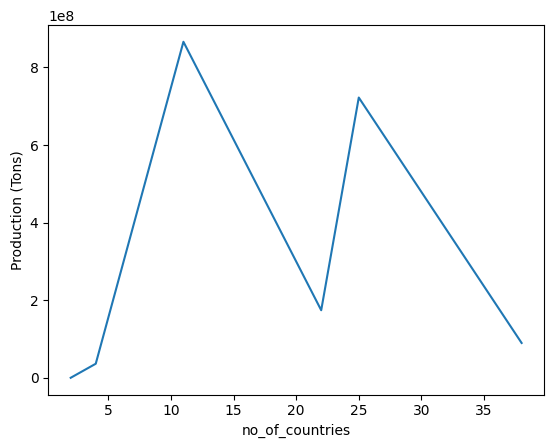

In [183]:
sns.lineplot(x = "no_of_countries" , y = "Production (Tons)" , data = df_conti)

## Do continent with highest land produces more sugarcane?


<Axes: xlabel='Acreage (Hectare)', ylabel='Production (Tons)'>

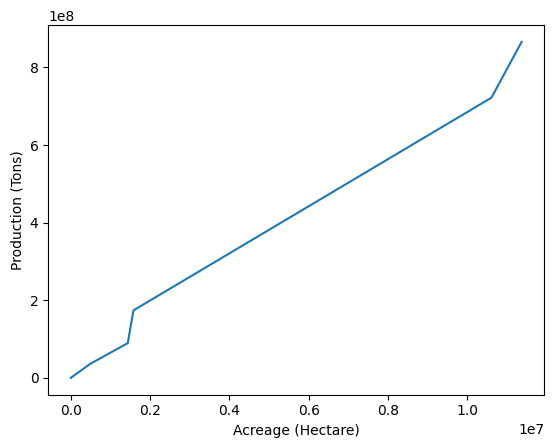

In [185]:
sns.lineplot(x = "Acreage (Hectare)", y = "Production (Tons)", data = df_conti)

## Production distribution by continent


Text(0.5, 1.0, 'Production distribution by continent')

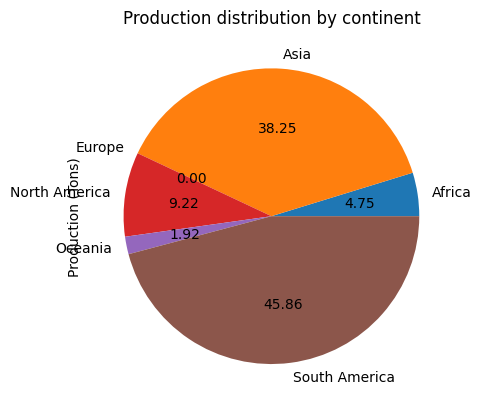

In [190]:
df_conti["Production (Tons)"].plot(kind = "pie", autopct = "%.2f")
plt.title("Production distribution by continent")

In [192]:
df_conti.corr(numeric_only= True)

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),no_of_countries
Production (Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production per Person (Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage (Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield (Kg / Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
no_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000
